# brunch story
[보스턴 주택(boston housing) 그리고 데이터](https://brunch.co.kr/@aichemist/6)

# Article  
**Harrison, D., Jr., & Rubinfeld, D. L. (1978).**  
*Hedonic Housing Prices and the Demand for Clean Air*.  
*Journal of Environmental Economics and Management*, 5(1), 81–102.  
[PDF Link](https://deepblue.lib.umich.edu/bitstream/handle/2027.42/22636/0000186.pdf)

> ⚠️ [**Ethical Warning**](https://deepblue.lib.umich.edu/handle/2027.42/22636)  
> This notebook is based on the 1970s study *"Hedonic Housing Prices and the Demand for Clean Air"*.  
> The original dataset includes racially biased variables due to discriminatory data collection practices.  
> Please approach this work with critical awareness of its ethical limitations.

📄 **License**  
This article is distributed via the University of Michigan’s Deep Blue repository under the  
[Creative Commons Attribution-NonCommercial-NoDerivatives 4.0 International License (CC BY-NC-ND 4.0)](https://creativecommons.org/licenses/by-nc-nd/4.0/).  
You are free to share with attribution, but not for commercial use and not to modify the material.


# library import

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# boston housing data

In [ ]:
# https://scikit-learn.org/1.0/modules/generated/sklearn.datasets.load_boston.html
# In this special case, you can fetch the dataset from the original source:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2].reshape(-1,1)

# add col names
cols = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.DataFrame(np.hstack([data, target]), columns=cols)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


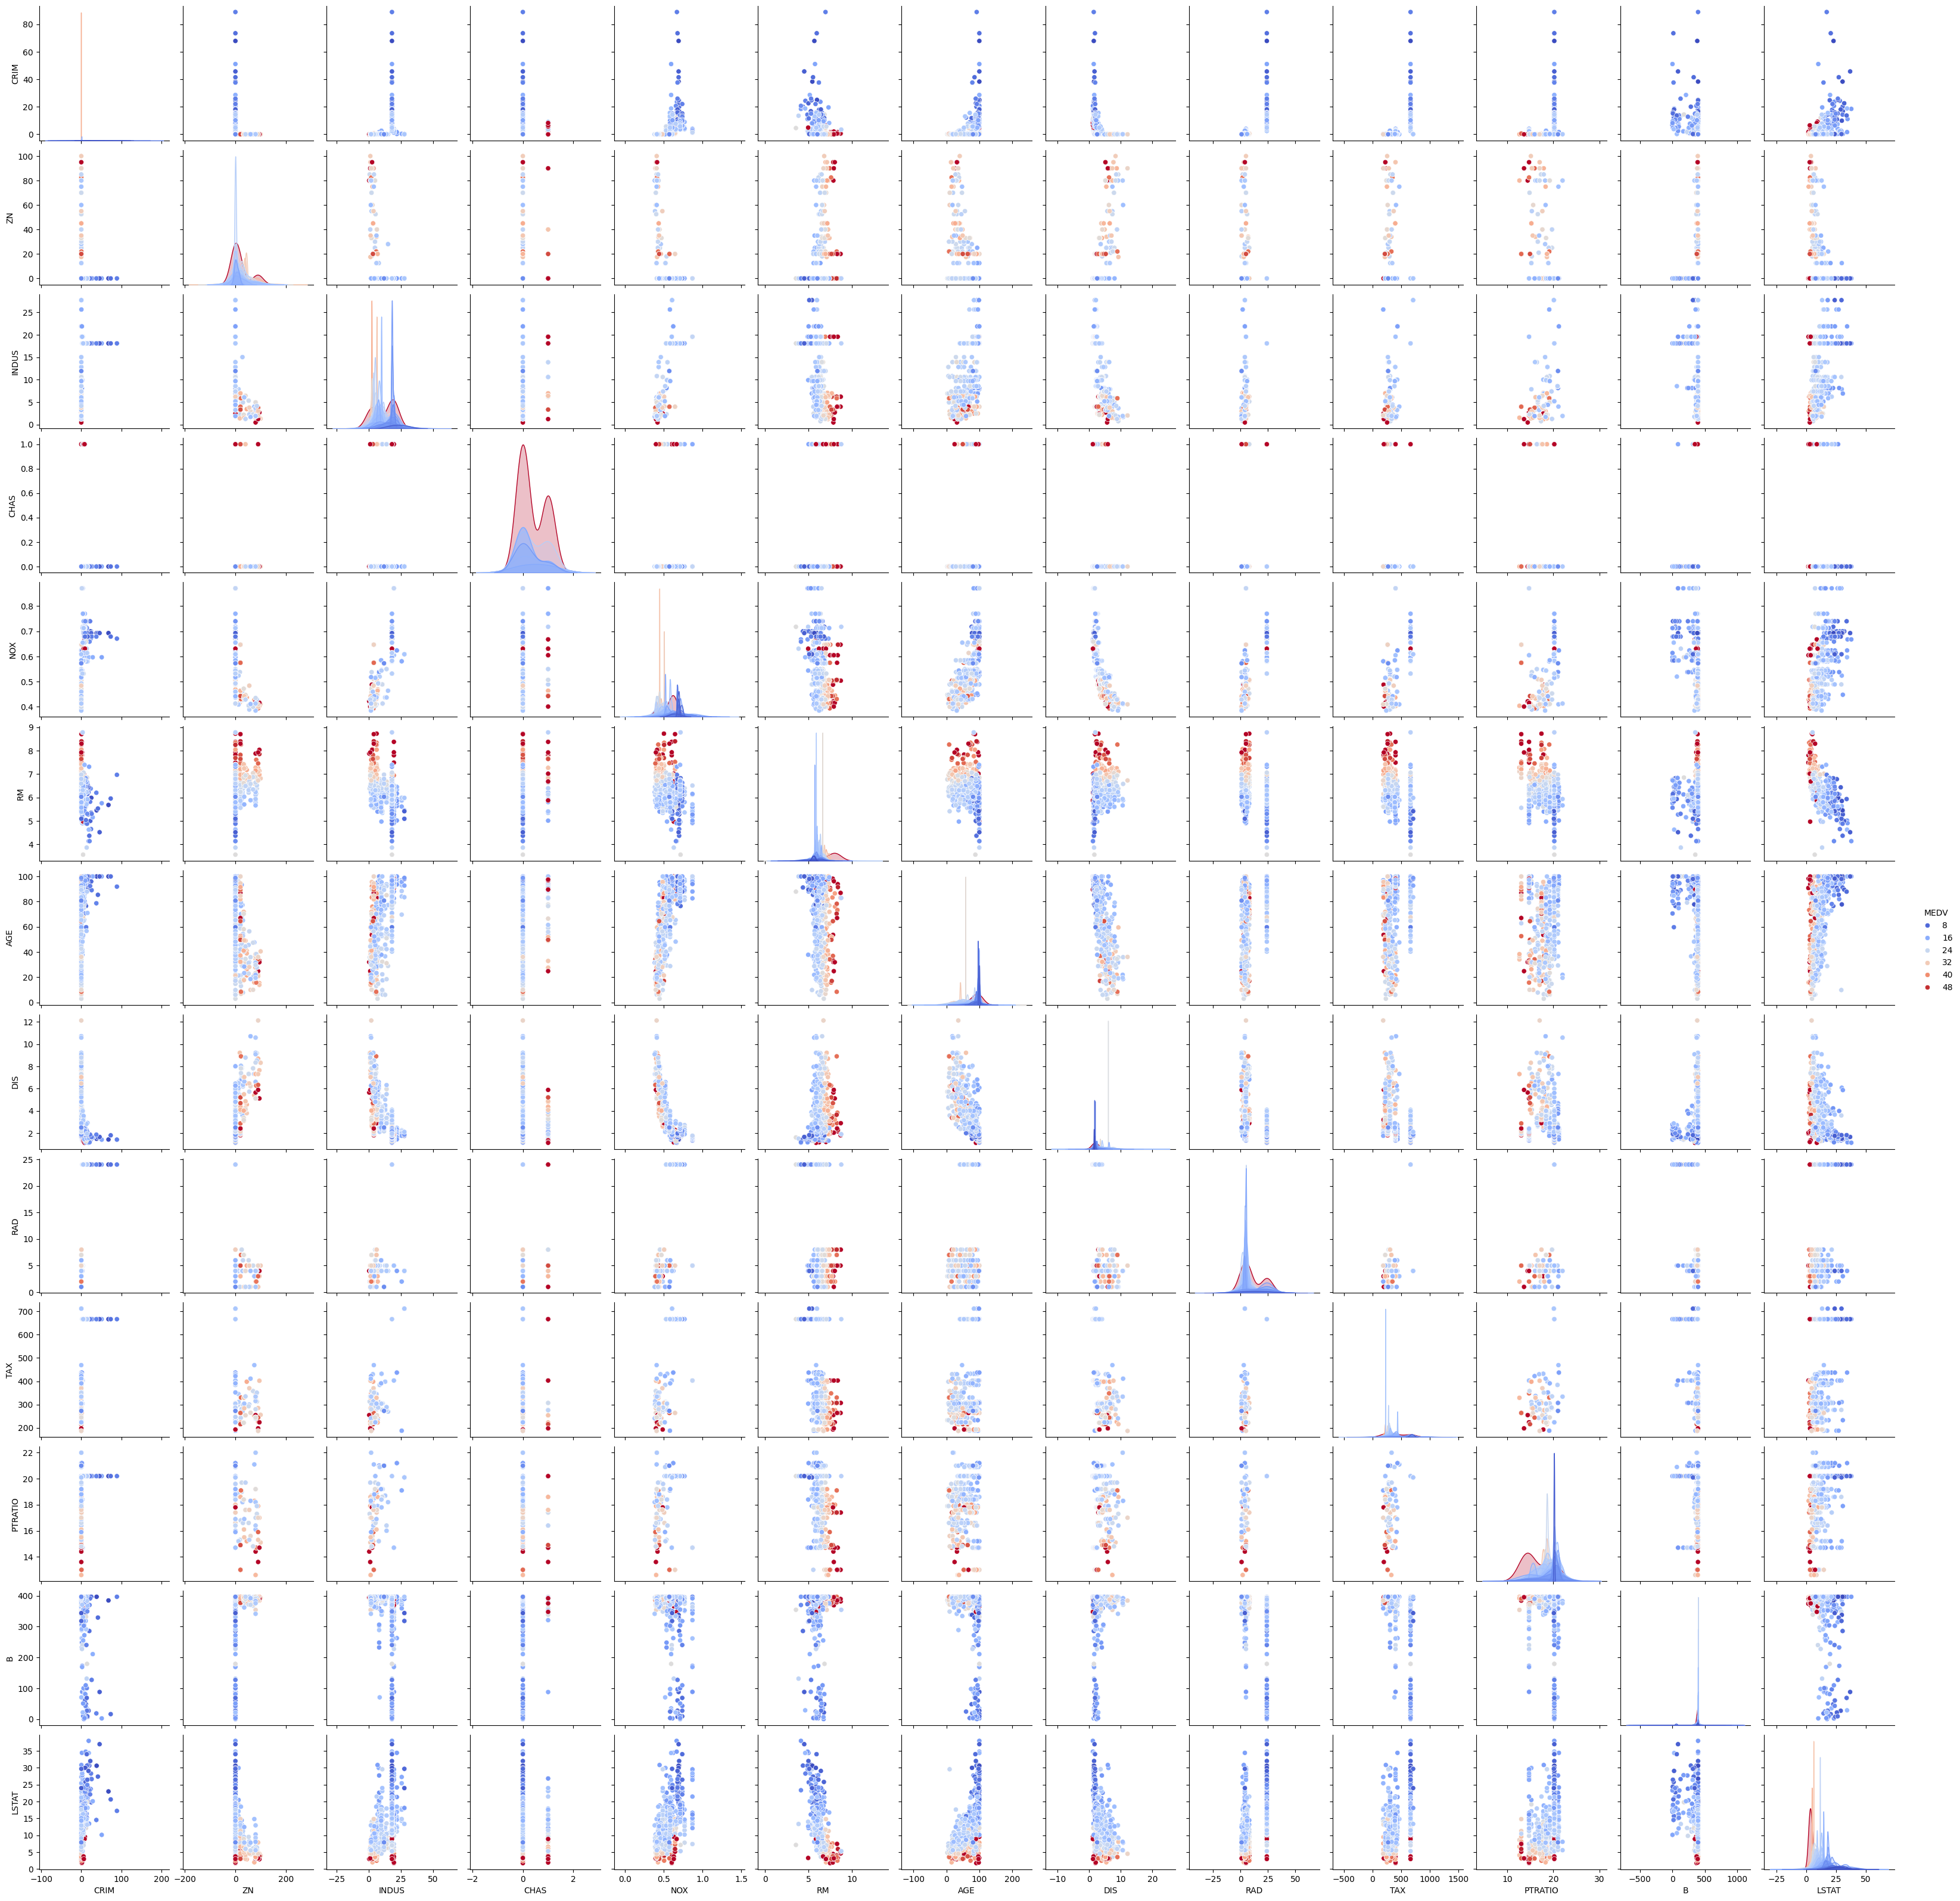

In [36]:
sns.pairplot(df, hue='MEDV', palette='coolwarm')
plt.show()

In [ ]:
# 상관계수 행렬 계산 및 반올림
## cols order given in article table iv.
corr = df[['MEDV','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','CRIM','ZN','INDUS','CHAS','NOX']].corr().round(2)
# 시각화
corr.style.background_gradient(cmap='coolwarm').format(precision=2)

,MEDV,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,CRIM,ZN,INDUS,CHAS,NOX
MEDV,1.00,0.70,-0.38,0.25,-0.38,-0.47,-0.51,0.33,-0.74,-0.39,0.36,-0.48,0.18,-0.43
RM,0.70,1.00,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,-0.22,0.31,-0.39,0.09,-0.30
AGE,-0.38,-0.24,1.00,-0.75,0.46,0.51,0.26,-0.27,0.60,0.35,-0.57,0.64,0.09,0.73
DIS,0.25,0.21,-0.75,1.00,-0.49,-0.53,-0.23,0.29,-0.50,-0.38,0.66,-0.71,-0.10,-0.77
RAD,-0.38,-0.21,0.46,-0.49,1.00,0.91,0.46,-0.44,0.49,0.63,-0.31,0.60,-0.01,0.61
TAX,-0.47,-0.29,0.51,-0.53,0.91,1.00,0.46,-0.44,0.54,0.58,-0.31,0.72,-0.04,0.67
PTRATIO,-0.51,-0.36,0.26,-0.23,0.46,0.46,1.00,-0.18,0.37,0.29,-0.39,0.38,-0.12,0.19
B,0.33,0.13,-0.27,0.29,-0.44,-0.44,-0.18,1.00,-0.37,-0.39,0.18,-0.36,0.05,-0.38
LSTAT,-0.74,-0.61,0.60,-0.50,0.49,0.54,0.37,-0.37,1.00,0.46,-0.41,0.60,-0.05,0.59
CRIM,-0.39,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46,1.00,-0.20,0.41,-0.06,0.42



$\text{We assume the utility function is given by } U(x, h)$  
$\text{Assume } U(x, h) \text{ represents the utility from consumption } x \text{ and housing } h.$


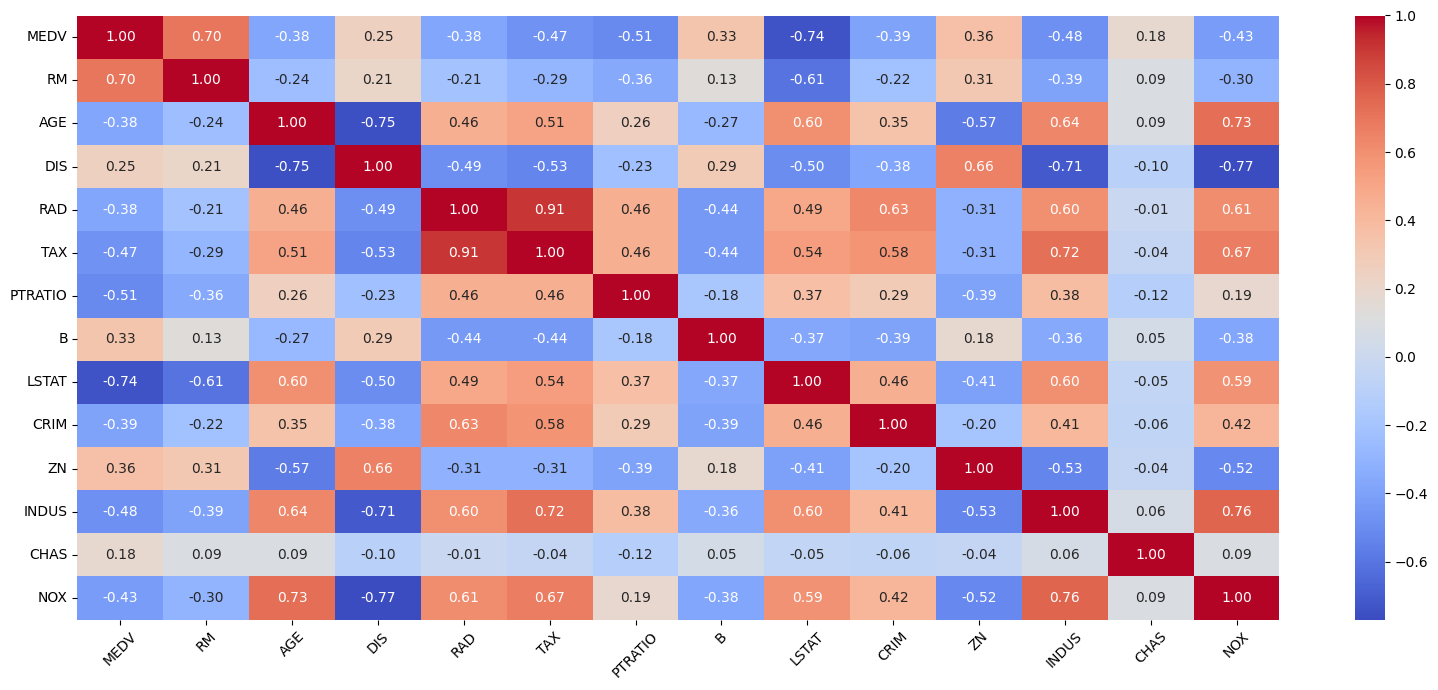

In [48]:
plt.figure(figsize=(16, 7))
sns.heatmap(data=corr, 
            cmap='coolwarm', 
            annot=True,         # 상관계수 숫자 표시
            fmt=".2f") #,          # 소수점 둘째 자리까지
            # linecolor='white')  # 경계선 색상

# plt.title("Correlation Heatmap", fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

to be continued...